# Imports

In [6]:
from diffusers import StableDiffusionUpscalePipeline
import torch
from PIL import Image
from io import BytesIO

# Parameters

In [7]:
image_folder = "./saved_images"
output_image_folder = image_folder + "/upscaled"
input_image_folder = image_folder + "/generated"
image_name = "output.png"

prompt = "a portrait photo of a shane man, handsome, photograph, photorealistic, hard rim lighting photography--beta --ar 2:3  --beta --upbeta, well lit"
n_prompt = "bad, deformed, ugly, bad anatomy, cartoon, animated, scary, wrinkles, duplicate, double"

model_id = "stabilityai/stable-diffusion-x4-upscaler"
inf_steps = 20
device = "cuda"

# Load image

In [8]:
low_res_img = Image.open(input_image_folder + "/" + image_name).convert("RGB").resize((256,256))

# Pipeline

100%|██████████| 20/20 [00:08<00:00,  2.50it/s]


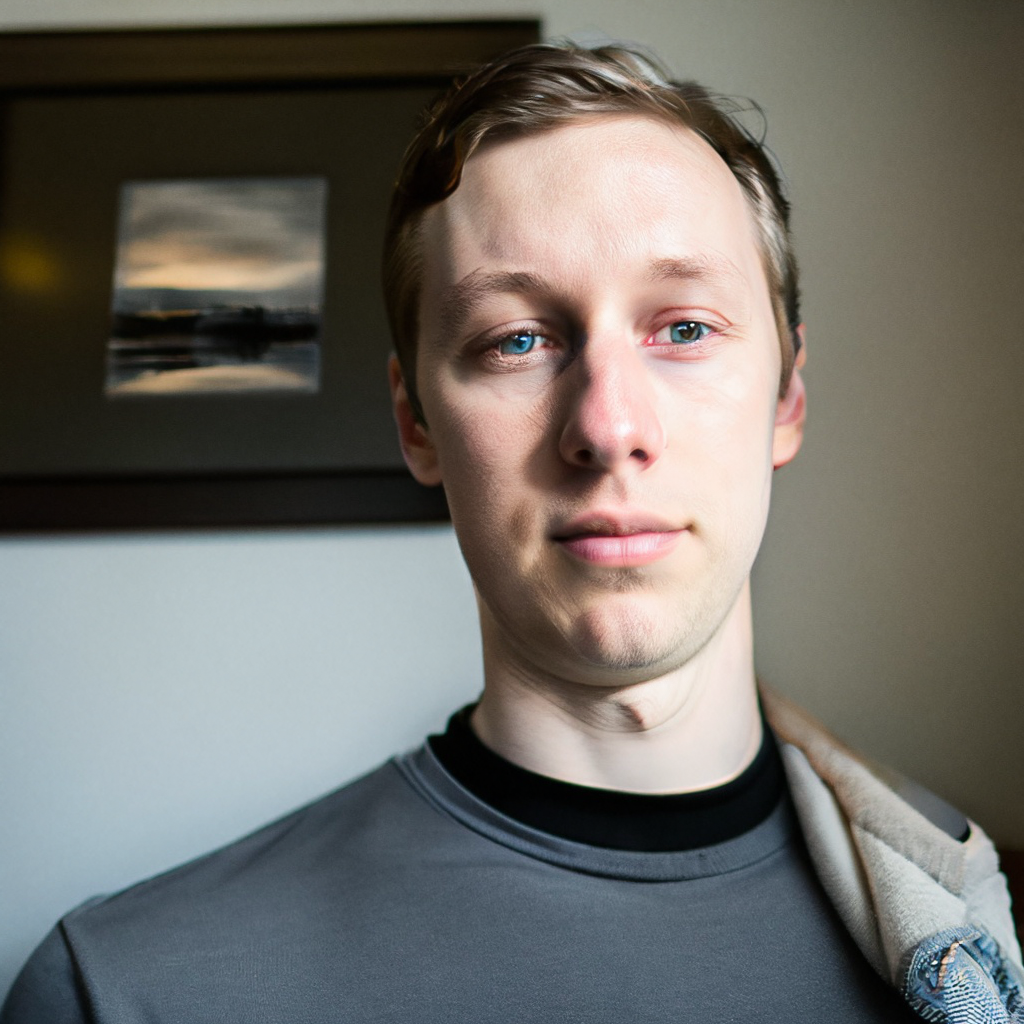

In [9]:
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to(device)
pipeline.enable_xformers_memory_efficient_attention()

upscaled_image = pipeline(prompt=prompt, negative_prompt=n_prompt, num_inference_steps=inf_steps, image=low_res_img).images[0]
upscaled_image

# Save image

In [10]:
upscaled_image.save(output_image_folder + "/" + image_name)